# The goal here is to predict whether a patient shows signs of diabetes based on diagnostic measurements.

In [1]:
import pandas as pd

data = pd.read_csv('/Users/arissalimi/logistic_reg/data/raw/diabetes.csv')
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [2]:
data.info()
data.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Checking the proportion of each class

In [ ]:
data['Outcome'].value_counts(normalize=True) * 100


Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64

In [8]:
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
print(data.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [13]:
TARGET = 'Outcome'
clean_data = data.dropna()

X = clean_data.drop(columns=[TARGET])
y = clean_data[TARGET]

In [16]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


# Now, let's split the data

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)

In [18]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
751,1,121,78,39,74,39.0,0.261,28
358,12,88,74,40,54,35.3,0.378,48
718,1,108,60,46,178,35.5,0.415,24
536,0,105,90,0,0,29.6,0.197,46
651,1,117,60,23,106,33.8,0.466,27
...,...,...,...,...,...,...,...,...
676,9,156,86,0,0,24.8,0.230,53
113,4,76,62,0,0,34.0,0.391,25
556,1,97,70,40,0,38.1,0.218,30
152,9,156,86,28,155,34.3,1.189,42


# Now, let's create the model

## 1- First, my baseline

In [19]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report

baseline = DummyClassifier(strategy="most_frequent")
baseline.fit(X_train,y_train)

y_pred_baseline = baseline.predict(X_test)
print("Baseline accuracy:", accuracy_score(y_test, y_pred_baseline))
print(classification_report(y_test, y_pred_baseline))


Baseline accuracy: 0.6510416666666666
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       125
           1       0.00      0.00      0.00        67

    accuracy                           0.65       192
   macro avg       0.33      0.50      0.39       192
weighted avg       0.42      0.65      0.51       192



/Users/arissalimi/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/arissalimi/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/arissalimi/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{me

## 2 - Now let's create our logistic regression model

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000,class_weight="balanced")
model.fit(X_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

# Checking the top coefficient

In [21]:
def top_coefficients(model, feature_names, top_k: int = 15) -> pd.DataFrame:
    """
    For logistic regression: returns strongest coefficients by absolute value.
    """
    coefs = pd.Series(model.coef_[0], index=feature_names)
    coefs = coefs.reindex(coefs.abs().sort_values(ascending=False).index)
    out = coefs.head(top_k).to_frame(name="coef")
    out["abs_coef"] = out["coef"].abs()
    return out

In [22]:
top_coefficients(model,X_train.columns,top_k=15)

,coef,abs_coef
DiabetesPedigreeFunction,0.790651,0.790651
Pregnancies,0.131798,0.131798
BMI,0.094641,0.094641
Glucose,0.034213,0.034213
Age,0.017229,0.017229
BloodPressure,-0.010602,0.010602
SkinThickness,-0.001474,0.001474
Insulin,-0.000637,0.000637


# Now, let predict the probability of each class

In [ ]:
from sklearn.metrics import precision_recall_curve
y_proba = model.predict_proba(X_test)[:,1]  # This will outputs probabilities for class 1. cause we're ostly care bout class 1. So, this line does not claasify, No threshold applied yet. Just risk scores.
y_proba

array([0.60049208, 0.49219622, 0.17214614, 0.59160822, 0.8732615 ,
       0.28539033, 0.47923372, 0.04867925, 0.75451838, 0.06677976,
       0.35092409, 0.84177579, 0.37021773, 0.16824103, 0.71115701,
       0.96236908, 0.76059867, 0.16308608, 0.05313942, 0.39819814,
       0.12706656, 0.27454057, 0.16249828, 0.87247842, 0.94450221,
       0.88772314, 0.19735864, 0.11633101, 0.94762115, 0.84860341,
       0.62712315, 0.01181164, 0.0929916 , 0.18043436, 0.94416101,
       0.24005916, 0.47685903, 0.20485267, 0.23766989, 0.12801633,
       0.92353983, 0.04131809, 0.23759048, 0.58619622, 0.89093843,
       0.8088082 , 0.9024785 , 0.20303709, 0.83060269, 0.99405661,
       0.40192191, 0.51019324, 0.52039228, 0.23281719, 0.78812303,
       0.4846392 , 0.85626797, 0.30107297, 0.46498286, 0.75409648,
       0.68875866, 0.71137898, 0.68820298, 0.12129314, 0.26158696,
       0.81651698, 0.06924145, 0.2801805 , 0.21008668, 0.14274134,
       0.55663086, 0.76506774, 0.86701639, 0.38341094, 0.00348

In [27]:
precision,recall,thresholds = precision_recall_curve(y_test,y_proba) # This function tests every possible threshold from 0 → 1 and computes Precision and Recall at each threshold

In [35]:
from sklearn.metrics import auc
# Step 2 — compute area under curve
pr_auc = auc(recall, precision)

print("PR-AUC:", pr_auc)

PR-AUC: 0.7136945244896729


# Now, let Plot the Precision-Recall Curve to visually see the trade-off.

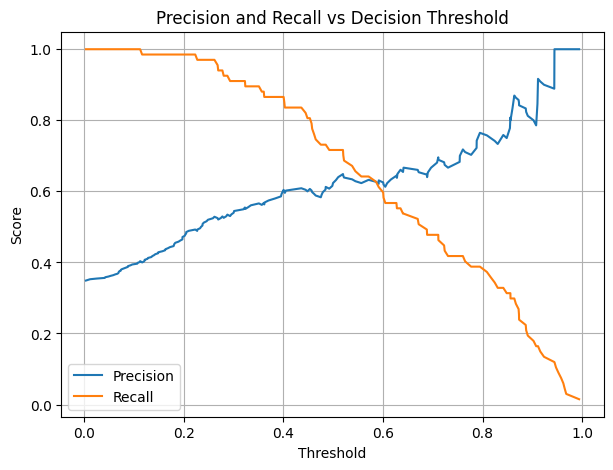

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.plot(thresholds,precision[:-1],label="Precision")
plt.plot(thresholds,recall[:-1],label="Recall")

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Decision Threshold")
plt.legend()
plt.grid(True)
plt.show()

## Base on this curve, we can see that the good Balanced trade-off between recall and precision is around threshold of 0.40, so let's use it as our threshold decision value

In [33]:
threshold = 0.40
y_pred = (y_proba >= threshold).astype(int) 

# Let's report now

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.70      0.79       125
           1       0.60      0.87      0.71        67

    accuracy                           0.76       192
   macro avg       0.76      0.78      0.75       192
weighted avg       0.80      0.76      0.76       192



# Interpretation

For class 1:
    - Precision = 0.60, so when the model predicts disease, it's wrong 40% of the time.
    - Recall = 0.87, so it misses only 13% of actual diseased patients.

So, the model is correctly detecting 87% of diabetic patients, (only 13% missed)



## Precision-Recall Performance
The model achieved a PR-AUC of 0.71, indicating strong ability to rank
patients with diabetes despite class imbalance and noisy clinical features.
This supports its use as a screening-oriented classifier.
